<a href="https://colab.research.google.com/github/Mahadev5/Parametric_Soybean/blob/main/Soybean%20Parametric%20Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/InRisk_Labs_Assignment.xlsx'
df = pd.read_excel(file_path)

In [ ]:
print(df.head())

     Region       Date  Rainfall_mm
0  Region_A 2024-01-01        4.965
1  Region_A 2024-01-02       27.729
2  Region_A 2024-01-03       12.881
3  Region_A 2024-01-04       32.818
4  Region_A 2024-01-05       36.127


In [ ]:
# Checks

# Number of recording by region
region_frequency = df['Region'].value_counts()
print("\nFrequency of recordings by region:\n", region_frequency)

# Nulls present?
print("Missing values:\n", df.isnull().sum())

# Regions empty?
print("\nUnique regions:", df['Region'].unique())

# Date checks
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Invalid dates become NaT
print("\nMissing or invalid dates:", df['Date'].isnull().sum())

# Numeric rainfall?
df['Rainfall_mm'] = pd.to_numeric(df['Rainfall_mm'], errors='coerce')
print("\nNon-numeric rainfall values:", df[df['Rainfall_mm'].isnull()])

# Negative rainfall?
print("\nNegative rainfall values:", df[df['Rainfall_mm'] < 0])

# Duplicate rows?
print("\nDuplicate rows:", df.duplicated().sum())

# Range of Dates
print("\nDate range:", df['Date'].min(), "to", df['Date'].max())

# Z-scores outlier
df['Rainfall_zscore'] = zscore(df['Rainfall_mm'].dropna())

# Identify outliers: Z-score > 3 or < -3
outliers = df[df['Rainfall_zscore'].abs() > 3]
print("\nOutliers in rainfall (Z-score > 3 or < -3):")
print(outliers)

# Summary Stats
print("\nBasic Statistics for Rainfall:\n", df['Rainfall_mm'].describe())


Frequency of recordings by region:
 Region
Region_A    91
Region_B    91
Region_C    91
Region_D    91
Region_E    91
Name: count, dtype: int64
Missing values:
 Region         0
Date           0
Rainfall_mm    0
dtype: int64

Unique regions: ['Region_A' 'Region_B' 'Region_C' 'Region_D' 'Region_E']

Missing or invalid dates: 0

Non-numeric rainfall values: Empty DataFrame
Columns: [Region, Date, Rainfall_mm]
Index: []

Negative rainfall values:        Region       Date  Rainfall_mm
182  Region_C 2024-01-01      -63.017
197  Region_C 2024-01-16      -21.957

Duplicate rows: 0

Date range: 2024-01-01 00:00:00 to 2024-03-31 00:00:00

Outliers in rainfall (Z-score > 3 or < -3):
       Region       Date   Rainfall_mm  Rainfall_zscore
212  Region_C 2024-01-31  1.843649e+09        21.307276

Basic Statistics for Rainfall:
 count    4.550000e+02
mean     4.052024e+06
std      8.643157e+07
min     -6.301700e+01
25%      2.289500e+01
50%      4.730800e+01
75%      7.652750e+01
max      1.843649e

Rainfall distribution by Region

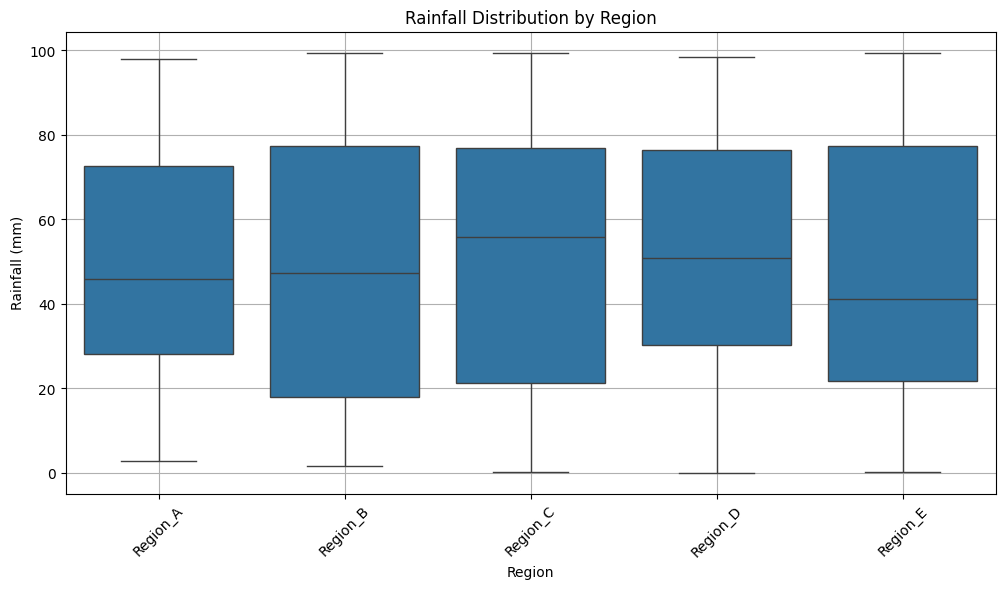

In [ ]:
# Calculate Z-scores for 'Rainfall_mm'
df['Rainfall_mm'] = df['Rainfall_mm'].apply(lambda x: -1 * x if x < 0 else x)
df['Rainfall_zscore'] = zscore(df['Rainfall_mm'])

# Remove outliers (Z-score > 3 or Z-score < -3)
df_no_outliers = df[(df['Rainfall_zscore'].abs() < 3)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Rainfall_mm', data=df_no_outliers)
plt.title('Rainfall Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Rainfall by Region, Time

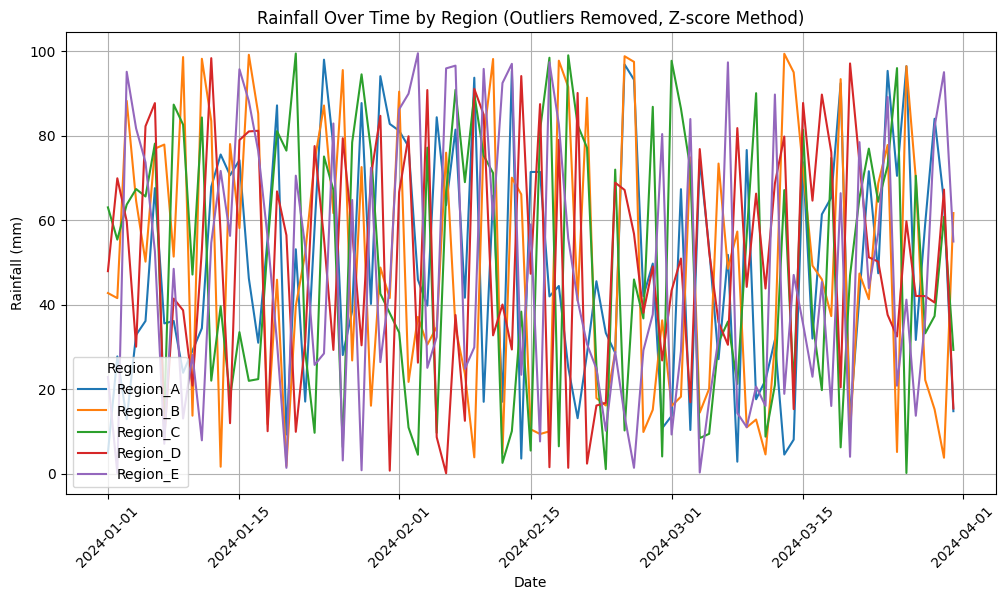

In [ ]:
plt.figure(figsize=(12, 6))

# Loop through each region and plot its rainfall over time (excluding outliers)
for region in df_no_outliers['Region'].unique():
    region_data = df_no_outliers[df_no_outliers['Region'] == region]
    plt.plot(region_data['Date'], region_data['Rainfall_mm'], label=region)

# Title and labels
plt.title('Rainfall Over Time by Region (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.show()

Calculating Claims

In [ ]:
# Flag excess rainfall
df['Excess_Rainfall'] = df['Rainfall_mm'] > 60

# Calculate the number of days with excess rainfall
excess_rainfall_days_by_region = df.groupby('Region')['Excess_Rainfall'].sum()

# Function to calculate claims based on the number of excess rainfall days
def calculate_claims(excess_days):
    if excess_days <= 10:
        return 0
    elif 11 <= excess_days <= 30:
        return excess_days * 100
    elif 31 <= excess_days <= 50:
        return excess_days * 200
    else:
        return excess_days * 300

# Calculate claims for each region based on excess rainfall days
claims_by_region = excess_rainfall_days_by_region.apply(calculate_claims)

# Display the claims by region
print("Days of excess rain by Region:\n", excess_rainfall_days_by_region)
print("Claims by Region (in Rupees):\n", claims_by_region)


Days of excess rain by Region:
 Region
Region_A    36
Region_B    37
Region_C    45
Region_D    35
Region_E    31
Name: Excess_Rainfall, dtype: int64
Claims by Region (in Rupees):
 Region
Region_A    7200
Region_B    7400
Region_C    9000
Region_D    7000
Region_E    6200
Name: Excess_Rainfall, dtype: int64
